# Librerías

In [225]:
import pandas as pd
import numpy as np
import os
from sklearn.impute import SimpleImputer
from scipy.stats import ks_2samp
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from varclushi import VarClusHi
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from scikitplot.metrics import plot_roc_curve

In [226]:
pd.set_option('display.max_columns',100)

# Introducción

- Generar un modelo de fuga, que ayude a la empresa de Telecomunicaciones a identificar si un cliente se va a ir o no 

# Funciones

In [227]:
from funcionesG19 import *

# Lectura de datos

In [228]:
ruta = 'churn_data/'

In [229]:
lst_files = os.listdir(ruta)

In [230]:
lst_files

['Churn.txt',
 'Telco_customer_churn.xlsx',
 'Telco_customer_churn_demographics.xlsx',
 'Telco_customer_churn_location.xlsx',
 'Telco_customer_churn_population.xlsx',
 'Telco_customer_churn_services.xlsx',
 'Telco_customer_churn_status.xlsx']

In [231]:
# Datos Churn / resumen
fl1 = pd.read_excel( os.path.join( ruta , lst_files[1]  ) )
fl1.columns = [ c.replace(' ','_') for c in fl1.columns.tolist()  ]
fl1.rename(columns={'CustomerID':'Customer_ID'},inplace=True)
print(fl1.shape)
display(fl1.head())

(7043, 33)


,Customer_ID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [232]:
# Datos personales
fl2 = pd.read_excel( os.path.join( ruta , lst_files[2]  ) )
fl2.columns = [ c.replace(' ','_') for c in fl2.columns.tolist()  ]
print(fl2.shape)
display(fl2.head())

(7043, 9)


,Customer_ID,Count,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [233]:
# Datos ubicación
fl3 = pd.read_excel( os.path.join( ruta , lst_files[3]  ) )
fl3.columns = [ c.replace(' ','_') for c in fl3.columns.tolist()  ]
print(fl3.shape)
display(fl3.head())

(7043, 9)


,Customer_ID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [234]:
# Datos población / catálogo de códigos postales
fl4 = pd.read_excel( os.path.join( ruta , lst_files[4]  ) )
fl4.columns = [ c.replace(' ','_') for c in fl4.columns.tolist()  ]
print(fl4.shape)
display(fl4.head())

(1671, 3)


,ID,Zip_Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


In [235]:
# Datos de los servicios
fl5 = pd.read_excel( os.path.join( ruta , lst_files[5]  ) )
fl5.columns = [ c.replace(' ','_') for c in fl5.columns.tolist()  ]
print(fl5.shape)
display(fl5.head())

(7043, 30)


,Customer_ID,Count,Quarter,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


# Pretratamiento / Limpieza

In [236]:
um = ['Customer_ID']
tgt = ['Churn_Value']

In [237]:
v_fuera = ['Count','Gender','Senior_Citizen','Dependents']

In [238]:
df = fl1.merge( fl2[ [ c for c in fl2.columns.tolist() if c not in v_fuera ]] , on=um , how='left'   ).reset_index(drop=True)

In [239]:
df.shape

(7043, 37)

In [240]:
df.head()

,Customer_ID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason,Age,Under_30,Married,Number_of_Dependents
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,37,No,No,0
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,19,Yes,No,2
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,31,No,No,2
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,23,Yes,Yes,3
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,38,No,No,1


In [241]:
df = df.merge( fl4[['Zip_Code','Population']] , on=['Zip_Code'], how='left' ).reset_index(drop=True)

In [242]:
df.shape

(7043, 38)

In [243]:
df.head()

,Customer_ID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason,Age,Under_30,Married,Number_of_Dependents,Population
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,37,No,No,0,58198
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,19,Yes,No,2,43019
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,31,No,No,2,62784
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,23,Yes,Yes,3,1957
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,38,No,No,1,15140


In [244]:
cols_df = df.columns.tolist()

In [245]:
cols_fl5 = fl5.columns.tolist()

In [246]:
v_fuera = list(set(cols_df) & set(cols_fl5))

In [247]:
v_fuera = v_fuera + ['Tenure_in_Months'] 

In [248]:
v_fuera = [ c for c in v_fuera if c != 'Customer_ID' ]

In [249]:
v_fuera

['Phone_Service',
 'Paperless_Billing',
 'Streaming_Movies',
 'Internet_Service',
 'Online_Security',
 'Payment_Method',
 'Count',
 'Contract',
 'Online_Backup',
 'Multiple_Lines',
 'Streaming_TV',
 'Total_Charges',
 'Tenure_in_Months']

In [250]:
df = df.merge(   fl5[[ c for c in fl5.columns.tolist() if c not in v_fuera  ]] , on=um , how='left'    ).reset_index(drop=True)

In [251]:
v_fuera = ['Count','Lat_Long','Churn_Label','Churn_Score','CLTV','Churn_Reason']

In [252]:
df = df[[ c for c in df.columns.tolist() if c not in v_fuera ]].reset_index(drop=True)

In [253]:
df = df[um+[ c for c in df.columns.tolist() if c not in um+tgt ]+tgt]

In [254]:
df.shape

(7043, 48)

# Variables

In [255]:
df.dtypes

Customer_ID                           object
Country                               object
State                                 object
City                                  object
Zip_Code                               int64
Latitude                             float64
Longitude                            float64
Gender                                object
Senior_Citizen                        object
Partner                               object
Dependents                            object
Tenure_Months                          int64
Phone_Service                         object
Multiple_Lines                        object
Internet_Service                      object
Online_Security                       object
Online_Backup                         object
Device_Protection                     object
Tech_Support                          object
Streaming_TV                          object
Streaming_Movies                      object
Contract                              object
Paperless_

In [256]:
# Continuas / Numércias
varc = ['Latitude','Longitude','Tenure_Months','Monthly_Charges','Total_Charges','Age','Number_of_Dependents','Population',
        'Number_of_Referrals','Avg_Monthly_Long_Distance_Charges','Avg_Monthly_GB_Download','Monthly_Charge','Total_Refunds',
        'Total_Extra_Data_Charges','Total_Long_Distance_Charges','Total_Revenue']
# Discretas / Categóricas 
vard = ['Country','State','City','Zip_Code','Gender','Senior_Citizen','Partner','Dependents','Phone_Service',
        'Multiple_Lines','Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support',
        'Streaming_TV','Streaming_Movies','Contract','Paperless_Billing','Payment_Method','Under_30','Married',
        'Quarter','Referred_a_Friend','Offer','Internet_Type','Device_Protection_Plan','Premium_Tech_Support',
        'Streaming_Music','Unlimited_Data']

In [257]:
for c in varc:
    df[c] =  pd.to_numeric( df[c] , errors='coerce' )

In [258]:
df['Zip_Code'] = df['Zip_Code'].apply(lambda x: str(x) if len( str(x) ) == 5 else '0'+str(x) )

In [259]:
df[vard].dtypes

Country                   object
State                     object
City                      object
Zip_Code                  object
Gender                    object
Senior_Citizen            object
Partner                   object
Dependents                object
Phone_Service             object
Multiple_Lines            object
Internet_Service          object
Online_Security           object
Online_Backup             object
Device_Protection         object
Tech_Support              object
Streaming_TV              object
Streaming_Movies          object
Contract                  object
Paperless_Billing         object
Payment_Method            object
Under_30                  object
Married                   object
Quarter                   object
Referred_a_Friend         object
Offer                     object
Internet_Type             object
Device_Protection_Plan    object
Premium_Tech_Support      object
Streaming_Music           object
Unlimited_Data            object
dtype: obj

In [260]:
df[varc].dtypes

Latitude                             float64
Longitude                            float64
Tenure_Months                          int64
Monthly_Charges                      float64
Total_Charges                        float64
Age                                    int64
Number_of_Dependents                   int64
Population                             int64
Number_of_Referrals                    int64
Avg_Monthly_Long_Distance_Charges    float64
Avg_Monthly_GB_Download                int64
Monthly_Charge                       float64
Total_Refunds                        float64
Total_Extra_Data_Charges               int64
Total_Long_Distance_Charges          float64
Total_Revenue                        float64
dtype: object

# Ingeniería de variables

In [261]:
df['ratio_total_charges_Age']  = df['Total_Charges'] / df['Age']

In [262]:
df['ratio_total_charges_Dependents'] = np.where(df['Number_of_Dependents'] == 0 , np.nan,  df['Total_Charges'] / df['Number_of_Dependents'] )

In [263]:
df['ratio_GB_Age']  = df['Avg_Monthly_GB_Download'] / df['Age']

In [264]:
varc = varc + ['ratio_total_charges_Age','ratio_total_charges_Dependents','ratio_GB_Age']

In [265]:
len(varc), varc

(19,
 ['Latitude',
  'Longitude',
  'Tenure_Months',
  'Monthly_Charges',
  'Total_Charges',
  'Age',
  'Number_of_Dependents',
  'Population',
  'Number_of_Referrals',
  'Avg_Monthly_Long_Distance_Charges',
  'Avg_Monthly_GB_Download',
  'Monthly_Charge',
  'Total_Refunds',
  'Total_Extra_Data_Charges',
  'Total_Long_Distance_Charges',
  'Total_Revenue',
  'ratio_total_charges_Age',
  'ratio_total_charges_Dependents',
  'ratio_GB_Age'])

# Análisis Exploratorio

## Discreto

### Reemplazo de NaN por "Sin Categoría"

In [266]:
for v in vard:
    df[v] = df[v].fillna('SIN CATEGORÍA')

### Análisis de Frecuencias

In [267]:
for v in vard:
    freq( df  , v)

Tabla de frecuencias para la variable Country 

                 FA   FR   FAA  FRA
United States  7043  1.0  7043  1.0 

Tabla de frecuencias para la variable State 

              FA   FR   FAA  FRA
California  7043  1.0  7043  1.0 

Tabla de frecuencias para la variable City 

                 FA        FR   FAA       FRA
Los Angeles     305  0.043305   305  0.043305
San Diego       150  0.021298   455  0.064603
San Jose        112  0.015902   567  0.080505
Sacramento      108  0.015334   675  0.095840
San Francisco   104  0.014766   779  0.110606
...             ...       ...   ...       ...
Healdsburg        4  0.000568  7027  0.997728
Jenner            4  0.000568  7031  0.998296
Philo             4  0.000568  7035  0.998864
Point Arena       4  0.000568  7039  0.999432
Olympic Valley    4  0.000568  7043  1.000000

[1129 rows x 4 columns] 

Tabla de frecuencias para la variable Zip_Code 

       FA        FR   FAA       FRA
90003   5  0.000710     5  0.000710
91436   5  0.000710

### Normalización

In [268]:
for v in vard:
    df =  norm(df, v , 0.03) # 0.03 o 0.05

In [269]:
df.shape

(7043, 81)

In [270]:
df.head()

,Customer_ID,Country,State,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Age,Under_30,Married,Number_of_Dependents,Population,Quarter,Referred_a_Friend,Number_of_Referrals,Offer,Avg_Monthly_Long_Distance_Charges,Internet_Type,Avg_Monthly_GB_Download,Device_Protection_Plan,Premium_Tech_Support,Streaming_Music,Unlimited_Data,Monthly_Charge,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Churn_Value,ratio_total_charges_Age,ratio_total_charges_Dependents,ratio_GB_Age,n_Country,n_State,n_City,n_Zip_Code,n_Gender,n_Senior_Citizen,n_Partner,n_Dependents,n_Phone_Service,n_Multiple_Lines,n_Internet_Service,n_Online_Security,n_Online_Backup,n_Device_Protection,n_Tech_Support,n_Streaming_TV,n_Streaming_Movies,n_Contract,n_Paperless_Billing,n_Payment_Method,n_Under_30,n_Married,n_Quarter,n_Referred_a_Friend,n_Offer,n_Internet_Type,n_Device_Protection_Plan,n_Premium_Tech_Support,n_Streaming_Music,n_Unlimited_Data
0,3668-QPYBK,United States,California,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,37,No,No,0,58198,Q3,No,0,None,10.47,DSL,21,No,No,No,Yes,53.85,0.0,0,20.94,129.09,1,2.922973,NaN,0.567568,United States,California,Los Angeles,CAT PEQUEÑAS,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,No,Q3,No,None,DSL,No,No,No,Yes
1,9237-HQITU,United States,California,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,19,Yes,No,2,43019,Q3,No,0,None,9.12,Fiber Optic,51,No,No,No,Yes,70.70,0.0,0,18.24,169.89,1,7.981579,75.825,2.684211,United States,California,Los Angeles,CAT PEQUEÑAS,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,No,Q3,No,None,Fiber Optic,No,No,No,Yes
2,9305-CDSKC,United States,California,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,31,No,No,2,62784,Q3,No,0,None,12.15,Cable,26,Yes,No,Yes,Yes,99.65,0.0,0,97.20,917.70,1,26.467742,410.250,0.838710,United States,California,Los Angeles,CAT PEQUEÑAS,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,No,No,Q3,No,None,Cable,Yes,No,Yes,Yes
3,7892-POOKP,United States,California,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,23,Yes,Yes,3,1957,Q3,No,0,Offer C,4.89,Fiber Optic,47,Yes,Yes,Yes,Yes,104.80,0.0,0,136.92,3182.97,1,132.436957,1015.350,2.043478,United States,California,Los Angeles,CAT PEQUEÑAS,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Yes,Q3,No,Offer C,Fiber Optic,Yes,Yes,Yes,Yes
4,0280-XJGEX,United States,California,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,38,No,No,1,15140,Q3,No,0,None,44.33,Fiber Optic,11,Yes,No,Yes,Yes,103.70,0.0,0,2172.17,7208.47,1,132.534211,5036.300,0.289474,United States,California,Los Angeles,CAT PEQUEÑAS,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),No,No,Q3,No,None,Fiber Optic,Yes,No,Yes,Yes


In [271]:
varn = [c for c in df.filter( like='n_').columns.tolist() if c[:2] == 'n_' ]

In [272]:
len(varn),varn

(30,
 ['n_Country',
  'n_State',
  'n_City',
  'n_Zip_Code',
  'n_Gender',
  'n_Senior_Citizen',
  'n_Partner',
  'n_Dependents',
  'n_Phone_Service',
  'n_Multiple_Lines',
  'n_Internet_Service',
  'n_Online_Security',
  'n_Online_Backup',
  'n_Device_Protection',
  'n_Tech_Support',
  'n_Streaming_TV',
  'n_Streaming_Movies',
  'n_Contract',
  'n_Paperless_Billing',
  'n_Payment_Method',
  'n_Under_30',
  'n_Married',
  'n_Quarter',
  'n_Referred_a_Friend',
  'n_Offer',
  'n_Internet_Type',
  'n_Device_Protection_Plan',
  'n_Premium_Tech_Support',
  'n_Streaming_Music',
  'n_Unlimited_Data'])

In [273]:
for v in varn:
    freq( df  , v)

Tabla de frecuencias para la variable n_Country 

                 FA   FR   FAA  FRA
United States  7043  1.0  7043  1.0 

Tabla de frecuencias para la variable n_State 

              FA   FR   FAA  FRA
California  7043  1.0  7043  1.0 

Tabla de frecuencias para la variable n_City 

                FA        FR   FAA       FRA
CAT PEQUEÑAS  6738  0.956695  6738  0.956695
Los Angeles    305  0.043305  7043  1.000000 

Tabla de frecuencias para la variable n_Zip_Code 

                FA   FR   FAA  FRA
CAT PEQUEÑAS  7043  1.0  7043  1.0 

Tabla de frecuencias para la variable n_Gender 

          FA        FR   FAA       FRA
Male    3555  0.504756  3555  0.504756
Female  3488  0.495244  7043  1.000000 

Tabla de frecuencias para la variable n_Senior_Citizen 

       FA        FR   FAA       FRA
No   5901  0.837853  5901  0.837853
Yes  1142  0.162147  7043  1.000000 

Tabla de frecuencias para la variable n_Partner 

       FA        FR   FAA       FRA
No   3641  0.516967  3641  0.516

### Unarias

In [274]:
unarias = [ c for c, conteo in zip( varn , [ df[v].unique().shape[0] for v in varn ] )  if conteo == 1 ]

In [275]:
unarias

['n_Country', 'n_State', 'n_Zip_Code', 'n_Quarter']

In [276]:
varn = [ v for v in varn if v not in unarias ]

In [277]:
len(varn),varn

(26,
 ['n_City',
  'n_Gender',
  'n_Senior_Citizen',
  'n_Partner',
  'n_Dependents',
  'n_Phone_Service',
  'n_Multiple_Lines',
  'n_Internet_Service',
  'n_Online_Security',
  'n_Online_Backup',
  'n_Device_Protection',
  'n_Tech_Support',
  'n_Streaming_TV',
  'n_Streaming_Movies',
  'n_Contract',
  'n_Paperless_Billing',
  'n_Payment_Method',
  'n_Under_30',
  'n_Married',
  'n_Referred_a_Friend',
  'n_Offer',
  'n_Internet_Type',
  'n_Device_Protection_Plan',
  'n_Premium_Tech_Support',
  'n_Streaming_Music',
  'n_Unlimited_Data'])

## Continuas

In [278]:
X = df[varc].copy()

In [279]:
X.shape

(7043, 19)

### Análisis Univariado

In [280]:
X.describe()

,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Age,Number_of_Dependents,Population,Number_of_Referrals,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,ratio_total_charges_Age,ratio_total_charges_Dependents,ratio_GB_Age
count,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,1620.000000,7043.000000
mean,36.282441,-119.798880,32.371149,64.761692,2283.300441,46.509726,0.468692,21181.589238,1.951867,22.958954,20.515405,64.761692,1.962182,6.860713,749.099262,3034.379056,56.179356,1492.821879,0.613199
std,2.455723,2.157889,24.559481,30.090047,2266.771362,16.750352,0.962802,20901.246553,3.001199,15.448113,20.418940,30.090047,7.902614,25.104978,846.660055,2865.204542,65.109243,1756.700476,0.858181
min,32.555828,-124.301372,0.000000,18.250000,18.800000,19.000000,0.000000,11.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,21.360000,0.260625,2.750000,0.000000
25%,34.030915,-121.815412,9.000000,35.500000,401.450000,32.000000,0.000000,2048.000000,0.000000,9.210000,3.000000,35.500000,0.000000,0.000000,70.545000,605.610000,8.969203,275.204167,0.062500
50%,36.391777,-119.730885,29.000000,70.350000,1397.475000,46.000000,0.000000,15975.000000,0.000000,22.890000,17.000000,70.350000,0.000000,0.000000,401.440000,2108.640000,31.780052,827.787500,0.305556
75%,38.224869,-118.043237,55.000000,89.850000,3794.737500,60.000000,0.000000,34146.000000,3.000000,36.395000,27.000000,89.850000,0.000000,0.000000,1191.100000,4801.145000,81.473480,2001.925000,0.593750
max,41.962127,-114.192901,72.000000,118.750000,8684.800000,80.000000,9.000000,105285.000000,11.000000,49.990000,85.000000,118.750000,49.790000,150.000000,3564.720000,11979.340000,410.873684,8670.100000,4.473684


array([[<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Tenure_Months'}>,
        <Axes: title={'center': 'Monthly_Charges'}>],
       [<Axes: title={'center': 'Total_Charges'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number_of_Dependents'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'Number_of_Referrals'}>,
        <Axes: title={'center': 'Avg_Monthly_Long_Distance_Charges'}>,
        <Axes: title={'center': 'Avg_Monthly_GB_Download'}>,
        <Axes: title={'center': 'Monthly_Charge'}>],
       [<Axes: title={'center': 'Total_Refunds'}>,
        <Axes: title={'center': 'Total_Extra_Data_Charges'}>,
        <Axes: title={'center': 'Total_Long_Distance_Charges'}>,
        <Axes: title={'center': 'Total_Revenue'}>],
       [<Axes: title={'center': 'ratio_total_charges_Age'}>,
        <Axes: title={'center': 'ratio_total_charges_Dependents'}>,
  

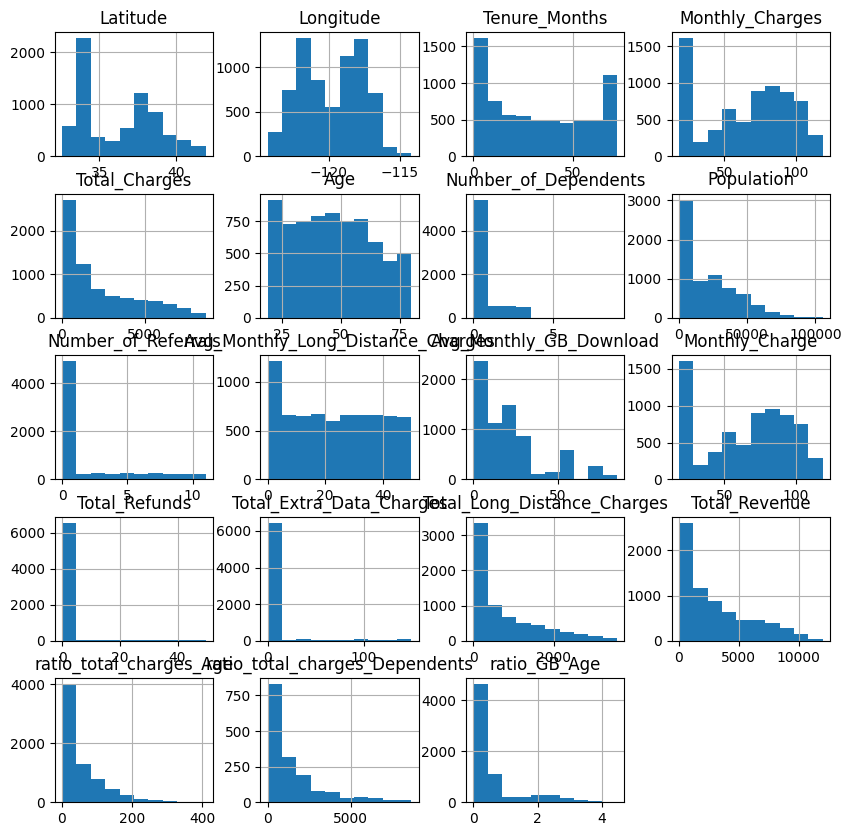

In [281]:
X.hist(figsize=(10,10))

### Valores Ausentes

In [282]:
miss = 1 - X[varc].describe().T[['count']] / len(X)

In [283]:
miss*100

,count
Latitude,0.000000
Longitude,0.000000
Tenure_Months,0.000000
Monthly_Charges,0.000000
Total_Charges,0.156183
Age,0.000000
Number_of_Dependents,0.000000
Population,0.000000
Number_of_Referrals,0.000000
Avg_Monthly_Long_Distance_Charges,0.000000


In [284]:
X.shape , X.dropna().shape , X.dropna().shape[0] / X.shape[0]

((7043, 19), (1620, 19), 0.2300156183444555)

### Imputación 

In [285]:
im = SimpleImputer(strategy='mean') ### La media puede afectarse mucho por valores extremos

In [286]:
im.fit(X)

SimpleImputer()

In [287]:
X[varc] = im.transform(X[varc])

In [288]:
X.shape , X.dropna().shape , X.dropna().shape[0] / X.shape[0]

((7043, 19), (7043, 19), 1.0)

### Validación de distribución alterada

In [289]:
# arriba de .1 la variable está rota
df_ks = pd.DataFrame( map( lambda x: (x , ks_2samp( df[x].dropna() , X[x] ).statistic ) , varc  ) , columns=['var','ks']  )
df_ks

,var,ks
0,Latitude,0.000000
1,Longitude,0.000000
2,Tenure_Months,0.000000
3,Monthly_Charges,0.000000
4,Total_Charges,0.000975
5,Age,0.000000
6,Number_of_Dependents,0.000000
7,Population,0.000000
8,Number_of_Referrals,0.000000
9,Avg_Monthly_Long_Distance_Charges,0.000000


In [290]:
var_rotas = df_ks.loc[ df_ks.ks >= .1 ]['var'].tolist()

In [291]:
varc = [v for v in varc if v not in var_rotas]

In [292]:
len(varc), varc

(18,
 ['Latitude',
  'Longitude',
  'Tenure_Months',
  'Monthly_Charges',
  'Total_Charges',
  'Age',
  'Number_of_Dependents',
  'Population',
  'Number_of_Referrals',
  'Avg_Monthly_Long_Distance_Charges',
  'Avg_Monthly_GB_Download',
  'Monthly_Charge',
  'Total_Refunds',
  'Total_Extra_Data_Charges',
  'Total_Long_Distance_Charges',
  'Total_Revenue',
  'ratio_total_charges_Age',
  'ratio_GB_Age'])

### Varianza

In [293]:
vt = VarianceThreshold(threshold=1.0)

In [294]:
vt.fit(X[varc])

VarianceThreshold(threshold=1.0)

In [295]:
sin_varianza = [v for v,u in zip( varc, vt.get_support() ) if not(u)  ]

In [296]:
sin_varianza

['Number_of_Dependents', 'ratio_GB_Age']

array([[<Axes: title={'center': 'Number_of_Dependents'}>,
        <Axes: title={'center': 'ratio_GB_Age'}>]], dtype=object)

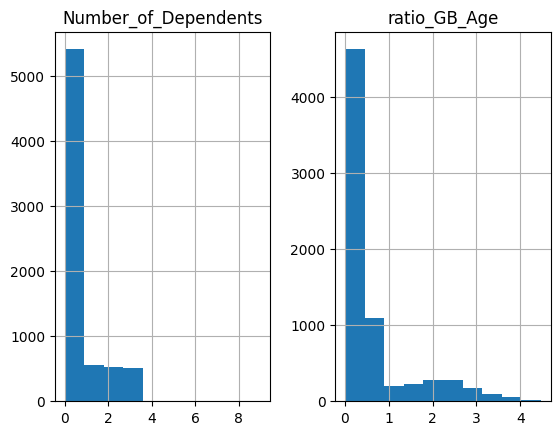

In [297]:
X[sin_varianza].hist()

In [298]:
X.drop( sin_varianza , axis=1 , inplace=True)

In [299]:
varc = [v for v in varc if v not in sin_varianza]

In [300]:
len(varc), varc

(16,
 ['Latitude',
  'Longitude',
  'Tenure_Months',
  'Monthly_Charges',
  'Total_Charges',
  'Age',
  'Population',
  'Number_of_Referrals',
  'Avg_Monthly_Long_Distance_Charges',
  'Avg_Monthly_GB_Download',
  'Monthly_Charge',
  'Total_Refunds',
  'Total_Extra_Data_Charges',
  'Total_Long_Distance_Charges',
  'Total_Revenue',
  'ratio_total_charges_Age'])

### Valores Extremos

In [301]:
ext = X[varc].describe( percentiles=[.005,.995] ).T[['0.5%','99.5%']].reset_index()

for v, li, ls in ext.values:
    X[f'ol_{v}'] = (( X[v] < li ) | ( X[v] > ls )).astype(int)
    
X['ext'] = X.filter(like='ol_').max(axis=1)

X.drop(X.filter(like='ol_').columns, axis=1, inplace=True)

X['ext'].value_counts(True)*100

0    92.531592
1     7.468408
Name: ext, dtype: float64

In [302]:
X[um] = df[um]

#### Eliminación de extremos

In [303]:
X = X.loc[ X['ext'] == 0].reset_index(drop=True).drop(['ext'], axis=1)

In [304]:
X

,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Age,Population,Number_of_Referrals,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,ratio_total_charges_Age,ratio_total_charges_Dependents,Customer_ID
0,33.964131,-118.272783,2.0,53.85,108.15,37.0,58198.0,0.0,10.47,21.0,53.85,0.00,0.0,20.94,129.09,2.922973,1492.821879,3668-QPYBK
1,34.059281,-118.307420,2.0,70.70,151.65,19.0,43019.0,0.0,9.12,51.0,70.70,0.00,0.0,18.24,169.89,7.981579,75.825000,9237-HQITU
2,34.048013,-118.293953,8.0,99.65,820.50,31.0,62784.0,0.0,12.15,26.0,99.65,0.00,0.0,97.20,917.70,26.467742,410.250000,9305-CDSKC
3,34.062125,-118.315709,28.0,104.80,3046.05,23.0,1957.0,0.0,4.89,47.0,104.80,0.00,0.0,136.92,3182.97,132.436957,1015.350000,7892-POOKP
4,34.039224,-118.266293,49.0,103.70,5036.30,38.0,15140.0,0.0,44.33,11.0,103.70,0.00,0.0,2172.17,7208.47,132.534211,5036.300000,0280-XJGEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6512,34.159534,-116.425984,12.0,60.65,743.30,62.0,20486.0,0.0,0.00,24.0,60.65,40.41,0.0,0.00,702.89,11.988710,1492.821879,7750-EYXWZ
6513,34.341737,-116.539416,72.0,21.15,1419.40,30.0,2182.0,0.0,22.77,0.0,21.15,19.31,0.0,1639.44,3039.53,47.313333,1492.821879,2569-WGERO
6514,34.559882,-115.637164,72.0,103.20,7362.90,30.0,42.0,4.0,29.66,59.0,103.20,45.38,0.0,2135.52,9453.04,245.430000,3681.450000,2234-XADUH
6515,34.167800,-116.864330,11.0,29.60,346.45,32.0,301.0,1.0,0.00,17.0,29.60,27.24,0.0,0.00,319.21,10.826562,173.225000,4801-JZAZL


### Análisis Bivariado

In [305]:
X[varc].corr()

,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Age,Population,Number_of_Referrals,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,ratio_total_charges_Age
Latitude,1.000000,-0.877401,0.009611,-0.020864,-0.005107,-0.002519,-0.401655,0.004090,0.008904,-0.024516,-0.020864,-0.009030,-0.010827,0.005315,-0.002555,-0.005998
Longitude,-0.877401,1.000000,-0.012293,0.024081,0.005604,0.005362,0.254799,0.000419,-0.007583,0.030207,0.024081,-0.008482,0.010634,-0.004175,0.003332,0.004770
Tenure_Months,0.009611,-0.012293,1.000000,0.200254,0.820220,0.022310,-0.005687,0.322293,-0.012215,0.014993,0.200254,0.065842,0.073324,0.663900,0.848554,0.721199
Monthly_Charges,-0.020864,0.024081,0.200254,1.000000,0.627121,0.166061,-0.007054,0.011257,0.129878,0.376066,1.000000,0.021793,0.116414,0.211139,0.561578,0.521996
Total_Charges,-0.005107,0.005604,0.820220,0.627121,1.000000,0.082274,-0.004706,0.245468,0.045503,0.196090,0.627121,0.043226,0.112348,0.594664,0.971228,0.858161
Age,-0.002519,0.005362,0.022310,0.166061,0.082274,1.000000,-0.026624,-0.022785,-0.012887,-0.369322,0.166061,0.027859,0.029741,0.010295,0.068584,-0.283060
Population,-0.401655,0.254799,-0.005687,-0.007054,-0.004706,-0.026624,1.000000,-0.000267,-0.017713,0.012023,-0.007054,0.027724,0.010774,-0.014324,-0.007956,0.003273
Number_of_Referrals,0.004090,0.000419,0.322293,0.011257,0.245468,-0.022785,-0.000267,1.000000,-0.006871,0.032727,0.011257,0.024736,-0.000961,0.205974,0.255885,0.223966
Avg_Monthly_Long_Distance_Charges,0.008904,-0.007583,-0.012215,0.129878,0.045503,-0.012887,-0.017713,-0.006871,1.000000,-0.033494,0.129878,-0.020537,-0.002587,0.590949,0.211243,0.040143
Avg_Monthly_GB_Download,-0.024516,0.030207,0.014993,0.376066,0.196090,-0.369322,0.012023,0.032727,-0.033494,1.000000,0.376066,-0.007240,0.084596,-0.013217,0.152597,0.387186


In [306]:
import matplotlib.pyplot as plt

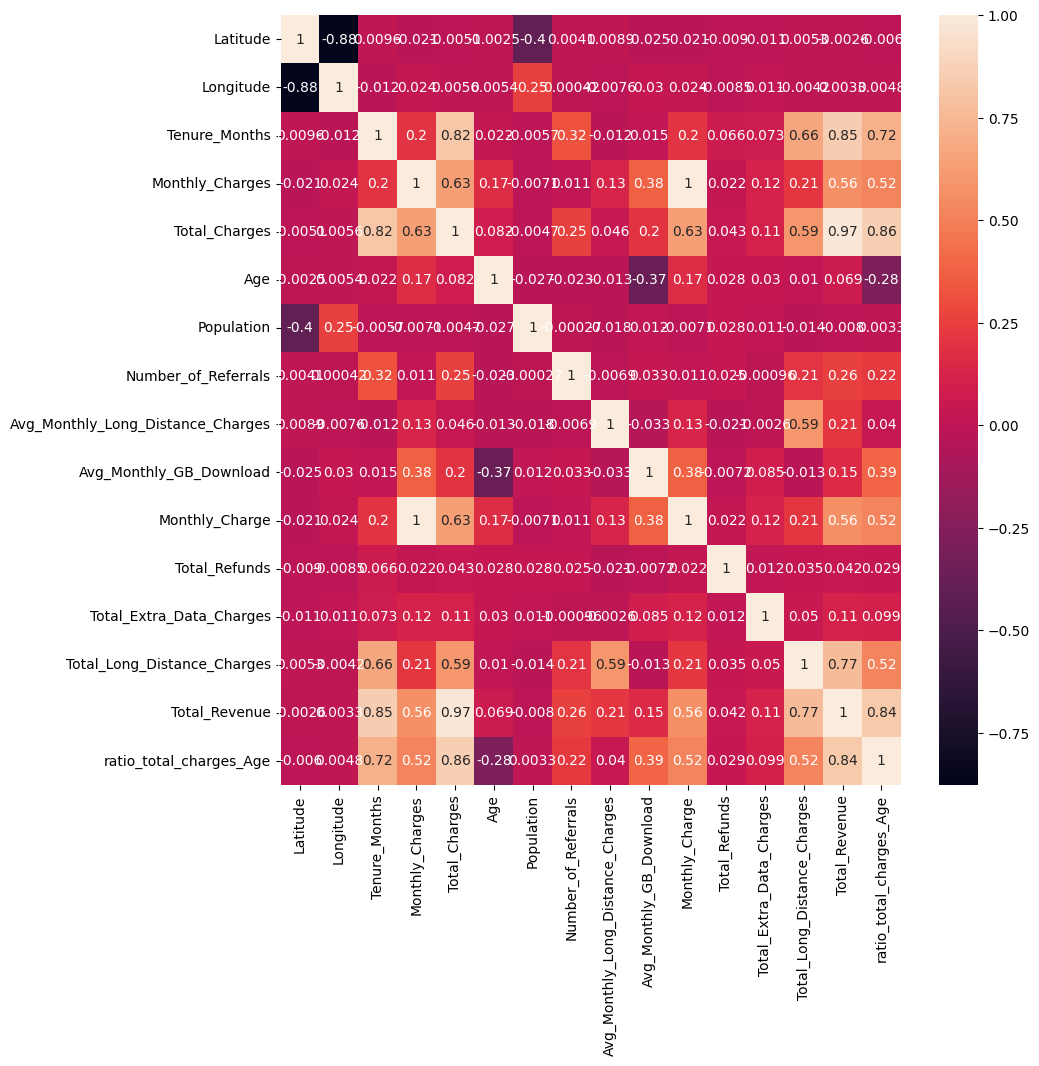

In [307]:
corr_df = X[varc].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

In [308]:
#sns.pairplot(X[varc].sample(500))

### Multicolinealidad

In [309]:
vc = VarClusHi( df=X[varc] , feat_list = varc )

In [310]:
vc.varclus()

In [311]:
rs = vc.rsquare
rs = rs.sort_values(by=['Cluster','RS_Ratio'] , ascending=[1,1]).reset_index(drop=True)
rs['id'] = rs.groupby('Cluster').cumcount() + 1
rs

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,id
0,0,Total_Revenue,0.937603,0.317468,0.091419,1
1,0,Total_Charges,0.932126,0.393954,0.111995,2
2,0,Tenure_Months,0.817541,0.133472,0.210564,3
3,0,ratio_total_charges_Age,0.810197,0.273545,0.261273,4
4,0,Number_of_Referrals,0.137675,0.012459,0.873204,5
5,0,Total_Refunds,0.004497,0.000514,0.996015,6
6,1,Latitude,0.915526,0.000470,0.084514,1
7,1,Longitude,0.835121,0.000615,0.164980,2
8,1,Population,0.327610,0.000545,0.672757,3
9,2,Monthly_Charges,0.987790,0.246162,0.016197,1


In [312]:
varc = rs.loc[ rs['id'] == 1 ]['Variable'].tolist()

In [313]:
len(varc),varc

(5,
 ['Total_Revenue',
  'Latitude',
  'Monthly_Charges',
  'Age',
  'Avg_Monthly_Long_Distance_Charges'])

array([[<Axes: title={'center': 'Total_Revenue'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Monthly_Charges'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Avg_Monthly_Long_Distance_Charges'}>,
        <Axes: >]], dtype=object)

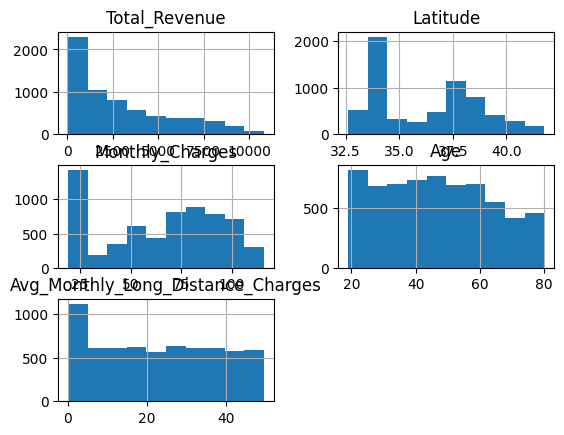

In [314]:
X[varc].hist()

# Discretizar

In [315]:
for v in varc:
    for k in range(2,5):
        X = discretizar(X, v, k)

In [316]:
X.shape

(6517, 33)

In [317]:
X.head()

,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Age,Population,Number_of_Referrals,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,ratio_total_charges_Age,ratio_total_charges_Dependents,Customer_ID,d_Total_Revenue_2,d_Total_Revenue_3,d_Total_Revenue_4,d_Latitude_2,d_Latitude_3,d_Latitude_4,d_Monthly_Charges_2,d_Monthly_Charges_3,d_Monthly_Charges_4,d_Age_2,d_Age_3,d_Age_4,d_Avg_Monthly_Long_Distance_Charges_2,d_Avg_Monthly_Long_Distance_Charges_3,d_Avg_Monthly_Long_Distance_Charges_4
0,33.964131,-118.272783,2.0,53.85,108.15,37.0,58198.0,0.0,10.47,21.0,53.85,0.0,0.0,20.94,129.09,2.922973,1492.821879,3668-QPYBK,"(25.148999999999997, 2075.05]","(25.148999999999997, 1010.82]","(25.148999999999997, 631.41]","(32.622, 36.414]","(32.622, 34.154]","(32.622, 34.037]","(19.049, 70.3]","(50.65, 83.35]","(39.1, 70.3]","(18.999, 46.0]","(18.999, 37.0]","(33.0, 46.0]","(-0.001, 22.64]","(-0.001, 13.56]","(9.19, 22.64]"
1,34.059281,-118.307420,2.0,70.70,151.65,19.0,43019.0,0.0,9.12,51.0,70.70,0.0,0.0,18.24,169.89,7.981579,75.825000,9237-HQITU,"(25.148999999999997, 2075.05]","(25.148999999999997, 1010.82]","(25.148999999999997, 631.41]","(32.622, 36.414]","(32.622, 34.154]","(34.037, 36.414]","(70.3, 115.8]","(50.65, 83.35]","(70.3, 89.6]","(18.999, 46.0]","(18.999, 37.0]","(18.999, 33.0]","(-0.001, 22.64]","(-0.001, 13.56]","(-0.001, 9.19]"
2,34.048013,-118.293953,8.0,99.65,820.50,31.0,62784.0,0.0,12.15,26.0,99.65,0.0,0.0,97.20,917.70,26.467742,410.250000,9305-CDSKC,"(25.148999999999997, 2075.05]","(25.148999999999997, 1010.82]","(631.41, 2075.05]","(32.622, 36.414]","(32.622, 34.154]","(34.037, 36.414]","(70.3, 115.8]","(83.35, 115.8]","(89.6, 115.8]","(18.999, 46.0]","(18.999, 37.0]","(18.999, 33.0]","(-0.001, 22.64]","(-0.001, 13.56]","(9.19, 22.64]"
3,34.062125,-118.315709,28.0,104.80,3046.05,23.0,1957.0,0.0,4.89,47.0,104.80,0.0,0.0,136.92,3182.97,132.436957,1015.350000,7892-POOKP,"(2075.05, 10830.97]","(1010.82, 3592.73]","(2075.05, 4678.38]","(32.622, 36.414]","(32.622, 34.154]","(34.037, 36.414]","(70.3, 115.8]","(83.35, 115.8]","(89.6, 115.8]","(18.999, 46.0]","(18.999, 37.0]","(18.999, 33.0]","(-0.001, 22.64]","(-0.001, 13.56]","(-0.001, 9.19]"
4,34.039224,-118.266293,49.0,103.70,5036.30,38.0,15140.0,0.0,44.33,11.0,103.70,0.0,0.0,2172.17,7208.47,132.534211,5036.300000,0280-XJGEX,"(2075.05, 10830.97]","(3592.73, 10830.97]","(4678.38, 10830.97]","(32.622, 36.414]","(32.622, 34.154]","(34.037, 36.414]","(70.3, 115.8]","(83.35, 115.8]","(89.6, 115.8]","(18.999, 46.0]","(37.0, 55.0]","(33.0, 46.0]","(22.64, 49.7]","(31.6, 49.7]","(35.96, 49.7]"


In [318]:
vari = X.filter(like='d_').columns.tolist()

In [319]:
vari

['d_Total_Revenue_2',
 'd_Total_Revenue_3',
 'd_Total_Revenue_4',
 'd_Latitude_2',
 'd_Latitude_3',
 'd_Latitude_4',
 'd_Monthly_Charges_2',
 'd_Monthly_Charges_3',
 'd_Monthly_Charges_4',
 'd_Age_2',
 'd_Age_3',
 'd_Age_4',
 'd_Avg_Monthly_Long_Distance_Charges_2',
 'd_Avg_Monthly_Long_Distance_Charges_3',
 'd_Avg_Monthly_Long_Distance_Charges_4']

# Poder Predictivo

In [320]:
X = X[um+vari].merge( df[um+varn ] , on= um , how='left' ).reset_index(drop=True)

In [321]:
y = X[um].merge(df[um+tgt], on=um, how='left').reset_index(drop=True)

## Particionar Datos

In [322]:
Xt, Xv, yt, yv =  train_test_split( X, y, train_size=0.7 )

In [323]:
Xt.shape, yt.shape[0],Xv.shape, yv.shape[0]

((4561, 42), 4561, (1956, 42), 1956)

In [324]:
Xt = Xt.merge( yt, on=um, how='inner' ).reset_index(drop=True)

In [325]:
Xt

,Customer_ID,d_Total_Revenue_2,d_Total_Revenue_3,d_Total_Revenue_4,d_Latitude_2,d_Latitude_3,d_Latitude_4,d_Monthly_Charges_2,d_Monthly_Charges_3,d_Monthly_Charges_4,d_Age_2,d_Age_3,d_Age_4,d_Avg_Monthly_Long_Distance_Charges_2,d_Avg_Monthly_Long_Distance_Charges_3,d_Avg_Monthly_Long_Distance_Charges_4,n_City,n_Gender,n_Senior_Citizen,n_Partner,n_Dependents,n_Phone_Service,n_Multiple_Lines,n_Internet_Service,n_Online_Security,n_Online_Backup,n_Device_Protection,n_Tech_Support,n_Streaming_TV,n_Streaming_Movies,n_Contract,n_Paperless_Billing,n_Payment_Method,n_Under_30,n_Married,n_Referred_a_Friend,n_Offer,n_Internet_Type,n_Device_Protection_Plan,n_Premium_Tech_Support,n_Streaming_Music,n_Unlimited_Data,Churn_Value
0,7890-VYYWG,"(25.148999999999997, 2075.05]","(25.148999999999997, 1010.82]","(25.148999999999997, 631.41]","(36.414, 41.77]","(37.767, 41.77]","(38.167, 41.77]","(19.049, 70.3]","(19.049, 50.65]","(19.049, 39.1]","(46.0, 80.0]","(55.0, 80.0]","(60.0, 80.0]","(-0.001, 22.64]","(-0.001, 13.56]","(-0.001, 9.19]",CAT PEQUEÑAS,Male,Yes,Yes,No,No,No phone service,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,No,Yes,Yes,Offer E,DSL,No,No,No,Yes,1
1,0848-SOMKO,"(2075.05, 10830.97]","(1010.82, 3592.73]","(2075.05, 4678.38]","(36.414, 41.77]","(37.767, 41.77]","(38.167, 41.77]","(19.049, 70.3]","(19.049, 50.65]","(39.1, 70.3]","(18.999, 46.0]","(18.999, 37.0]","(18.999, 33.0]","(-0.001, 22.64]","(-0.001, 13.56]","(-0.001, 9.19]",CAT PEQUEÑAS,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),Yes,No,No,None,DSL,Yes,Yes,Yes,Yes,0
2,6258-NGCNG,"(25.148999999999997, 2075.05]","(25.148999999999997, 1010.82]","(25.148999999999997, 631.41]","(32.622, 36.414]","(32.622, 34.154]","(32.622, 34.037]","(19.049, 70.3]","(19.049, 50.65]","(19.049, 39.1]","(46.0, 80.0]","(37.0, 55.0]","(46.0, 60.0]","(-0.001, 22.64]","(-0.001, 13.56]","(-0.001, 9.19]",CAT PEQUEÑAS,Male,No,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,No,No,No,Offer E,None,No,No,No,No,0
3,8920-NAVAY,"(2075.05, 10830.97]","(3592.73, 10830.97]","(4678.38, 10830.97]","(32.622, 36.414]","(32.622, 34.154]","(32.622, 34.037]","(70.3, 115.8]","(83.35, 115.8]","(89.6, 115.8]","(46.0, 80.0]","(55.0, 80.0]","(60.0, 80.0]","(22.64, 49.7]","(31.6, 49.7]","(35.96, 49.7]",Los Angeles,Male,Yes,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),No,No,No,None,Fiber Optic,Yes,Yes,Yes,Yes,0
4,1215-VFYVK,"(25.148999999999997, 2075.05]","(25.148999999999997, 1010.82]","(25.148999999999997, 631.41]","(36.414, 41.77]","(37.767, 41.77]","(36.414, 38.167]","(19.049, 70.3]","(19.049, 50.65]","(39.1, 70.3]","(18.999, 46.0]","(18.999, 37.0]","(18.999, 33.0]","(-0.001, 22.64]","(-0.001, 13.56]","(-0.001, 9.19]",CAT PEQUEÑAS,Female,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,No,Mailed check,Yes,No,No,Offer E,Cable,Yes,Yes,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556,5043-TRZWM,"(25.148999999999997, 2075.05]","(25.148999999999997, 1010.82]","(25.148999999999997, 631.41]","(32.622, 36.414]","(32.622, 34.154]","(32.622, 34.037]","(70.3, 115.8]","(50.65, 83.35]","(70.3, 89.6]","(18.999, 46.0]","(18.999, 37.0]","(18.999, 33.0]","(-0.001, 22.64]","(-0.001, 13.56]","(-0.001, 9.19]",Los Angeles,Female,No,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,No,No,No,None,Fiber Optic,Yes,No,No,Yes,0
4557,9444-JTXHZ,"(25.148999999999997, 2075.05]","(25.148999999999997, 1010.82]","(25.148999999999997, 631.41]","(32.622, 36.414]","(34.154, 37.767]","(34.037, 36.414]","(70.3, 115.8]","(50.65, 83.35]","(70.3, 89.6]","(46.0, 80.0]","(37.0, 55.0]","(46.0, 60.0]","(22.64, 49.7]","(31.6, 49.7]","(22.64, 35.96]",CAT PEQU

## Mejores Variables Discretizadas

In [326]:
iv = pd.DataFrame( map( lambda v: calculo_iv( Xt, v, tgt, um ) , vari ) , columns=['variable','iv'] )

In [327]:
iv['raiz'] = iv['variable'].map( lambda x: '_'.join(x.split('_')[1:-1] )   )

In [328]:
iv = iv.sort_values(by=['raiz','iv'],ascending=[1,0]).reset_index(drop=True)

In [329]:
iv['id'] = iv.groupby('raiz').cumcount()+1

In [330]:
besti = iv.loc[iv['id'] == 1]['variable'].tolist()

In [331]:
len(besti), besti

(5,
 ['d_Age_4',
  'd_Avg_Monthly_Long_Distance_Charges_3',
  'd_Latitude_3',
  'd_Monthly_Charges_4',
  'd_Total_Revenue_4'])

## Mejores Variables Normalizadas

In [332]:
ivd = pd.DataFrame( map( lambda v: calculo_iv( Xt, v, tgt, um ) , varn ) , columns=['variable','iv'] )

In [334]:
iv = pd.concat( [iv, ivd] ,ignore_index=True) 

In [337]:
iv = iv[['variable','iv']].sort_values(by='iv',ascending=False).reset_index(drop=True)

In [339]:
best = iv.loc[ (iv['iv'] > 0.01) & (iv['iv']< 0.8) ]['variable'].tolist()

In [341]:
len(best),best

(30,
 ['n_Tech_Support',
  'n_Online_Security',
  'n_Internet_Service',
  'n_Internet_Type',
  'n_Online_Backup',
  'n_Device_Protection',
  'n_Streaming_Movies',
  'n_Streaming_TV',
  'n_Dependents',
  'n_Payment_Method',
  'd_Monthly_Charges_4',
  'n_Offer',
  'd_Total_Revenue_4',
  'd_Total_Revenue_3',
  'd_Total_Revenue_2',
  'd_Monthly_Charges_2',
  'd_Monthly_Charges_3',
  'n_Paperless_Billing',
  'n_Unlimited_Data',
  'n_Premium_Tech_Support',
  'n_Referred_a_Friend',
  'n_Partner',
  'n_Married',
  'n_Senior_Citizen',
  'd_Age_4',
  'd_Age_3',
  'd_Age_2',
  'n_Streaming_Music',
  'n_Multiple_Lines',
  'n_Device_Protection_Plan'])

# Transformación WoE

In [342]:
X =  X[um +best].reset_index(drop=True)

In [343]:
X.shape, y.shape

((6517, 31), (6517, 2))

In [344]:
Xt, Xv, yt, yv =  train_test_split( X, y, train_size=0.7 )

In [345]:
Xt.shape, yt.shape[0],Xv.shape, yv.shape[0]

((4561, 31), 4561, (1956, 31), 1956)

In [346]:
Xt = Xt.merge( yt, on=um, how='inner' ).reset_index(drop=True)

In [347]:
Xt.shape

(4561, 32)

## Mapa WoE

In [349]:
mapa_woe = list( map( lambda v: codificacion_woe( Xt, v , tgt, um[0] ) , best  )   )

In [352]:
mapa_woe

[('n_Tech_Support',
  {'No': -0.6589810869966121,
   'No internet service': 1.6893212748283488,
   'Yes': 0.6570242552244941}),
 ('n_Online_Security',
  {'No': -0.6710898674616079,
   'No internet service': 1.6893212748283488,
   'Yes': 0.7330170989168685}),
 ('n_Internet_Service',
  {'DSL': 0.45540926865637105,
   'Fiber optic': -0.720562828021751,
   'No': 1.6893212748283488}),
 ('n_Internet_Type',
  {'Cable': 0.05822157861306426,
   'DSL': 0.4720000814556101,
   'Fiber Optic': -0.6689687365195848,
   'None': 1.6893212748283488}),
 ('n_Online_Backup',
  {'No': -0.585410109450255,
   'No internet service': 1.6893212748283488,
   'Yes': 0.24350121546463072}),
 ('n_Device_Protection',
  {'No': -0.5585464671807069,
   'No internet service': 1.6893212748283488,
   'Yes': 0.18370079216184354}),
 ('n_Streaming_Movies',
  {'No': -0.3192407292843872,
   'No internet service': 1.6893212748283488,
   'Yes': -0.19065815609452594}),
 ('n_Streaming_TV',
  {'No': -0.2959443994569764,
   'No interne

In [353]:
for v, mapa in mapa_woe:
    Xt[f'w_{v}'] = Xt[v].replace(mapa)
    Xv[f'w_{v}'] = Xv[v].replace(mapa)

In [355]:
varw = Xt.filter(like='w_').columns.tolist()

In [357]:
len(varw),varw

(30,
 ['w_n_Tech_Support',
  'w_n_Online_Security',
  'w_n_Internet_Service',
  'w_n_Internet_Type',
  'w_n_Online_Backup',
  'w_n_Device_Protection',
  'w_n_Streaming_Movies',
  'w_n_Streaming_TV',
  'w_n_Dependents',
  'w_n_Payment_Method',
  'w_d_Monthly_Charges_4',
  'w_n_Offer',
  'w_d_Total_Revenue_4',
  'w_d_Total_Revenue_3',
  'w_d_Total_Revenue_2',
  'w_d_Monthly_Charges_2',
  'w_d_Monthly_Charges_3',
  'w_n_Paperless_Billing',
  'w_n_Unlimited_Data',
  'w_n_Premium_Tech_Support',
  'w_n_Referred_a_Friend',
  'w_n_Partner',
  'w_n_Married',
  'w_n_Senior_Citizen',
  'w_d_Age_4',
  'w_d_Age_3',
  'w_d_Age_2',
  'w_n_Streaming_Music',
  'w_n_Multiple_Lines',
  'w_n_Device_Protection_Plan'])

# TAD

In [358]:
tad = Xt[um+varw].merge(yt, on=um, how='inner').reset_index(drop=True)

In [359]:
tad

,Customer_ID,w_n_Tech_Support,w_n_Online_Security,w_n_Internet_Service,w_n_Internet_Type,w_n_Online_Backup,w_n_Device_Protection,w_n_Streaming_Movies,w_n_Streaming_TV,w_n_Dependents,w_n_Payment_Method,w_d_Monthly_Charges_4,w_n_Offer,w_d_Total_Revenue_4,w_d_Total_Revenue_3,w_d_Total_Revenue_2,w_d_Monthly_Charges_2,w_d_Monthly_Charges_3,w_n_Paperless_Billing,w_n_Unlimited_Data,w_n_Premium_Tech_Support,w_n_Referred_a_Friend,w_n_Partner,w_n_Married,w_n_Senior_Citizen,w_d_Age_4,w_d_Age_3,w_d_Age_2,w_n_Streaming_Music,w_n_Multiple_Lines,w_n_Device_Protection_Plan,Churn_Value
0,3948-KXDUF,0.657024,0.733017,0.455409,0.058222,0.243501,0.183701,-0.319241,-0.295944,-0.284437,0.617805,0.068109,-0.011299,0.720231,0.650573,0.589134,0.524001,-0.164677,0.656687,-0.237548,0.657024,-0.315221,-0.316079,-0.316079,0.149642,-0.452602,-0.287213,-0.185894,0.096675,-0.102596,0.183701,0
1,5261-QSHQM,-0.658981,-0.671090,0.455409,0.472000,-0.585410,-0.558546,-0.319241,-0.295944,-0.284437,-0.897101,1.181198,-1.067630,-0.852479,-0.696352,-0.464549,0.524001,0.708027,-0.351516,-0.237548,-0.214882,-0.315221,-0.316079,-0.316079,0.149642,0.200728,0.172509,0.193260,0.096675,0.167151,-0.092059,1
2,3090-HAWSU,0.657024,0.733017,-0.720563,-0.668969,-0.585410,0.183701,-0.190658,-0.215489,-0.284437,0.736999,-0.336320,-0.011299,0.720231,0.650573,0.589134,-0.418410,-0.375061,-0.351516,-0.237548,0.657024,-0.315221,-0.316079,-0.316079,0.149642,0.185199,0.131804,0.193260,-0.166500,-0.102596,0.183701,1
3,2026-TGDHM,-0.658981,-0.671090,-0.720563,-0.668969,-0.585410,-0.558546,-0.190658,-0.295944,-0.284437,-0.897101,-0.498916,-0.011299,-0.039123,-0.696352,-0.464549,-0.418410,-0.164677,-0.351516,0.633126,-0.214882,-0.315221,-0.316079,-0.316079,0.149642,0.091210,0.131804,-0.185894,-0.166500,0.061199,-0.092059,1
4,7964-ZRKKG,-0.658981,-0.671090,-0.720563,-0.668969,0.243501,-0.558546,-0.319241,-0.215489,-0.284437,0.617805,-0.498916,-0.011299,0.720231,0.650573,0.589134,-0.418410,-0.375061,-0.351516,-0.237548,-0.214882,0.442535,0.398115,0.398115,0.149642,0.185199,0.131804,0.193260,0.096675,-0.102596,-0.092059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556,1415-YFWLT,-0.658981,-0.671090,-0.720563,-0.668969,-0.585410,-0.558546,-0.190658,-0.215489,-0.284437,-0.897101,-0.498916,-1.067630,-0.852479,-0.696352,-0.464549,-0.418410,-0.375061,-0.351516,-0.237548,-0.214882,-0.315221,-0.316079,-0.316079,-0.670251,-0.452602,-0.287213,-0.185894,0.096675,0.061199,-0.092059,1
4557,6733-LRIZX,0.657024,0.733017,-0.720563,-0.668969,-0.585410,0.183701,-0.190658,-0.215489,-0.284437,-0.897101,-0.336320,-0.011299,0.720231,0.650573,0.589134,-0.418410,-0.375061,-0.351516,-0.237548,0.657024,-0.315221,-0.316079,-0.316079,0.149642,0.185199,0.131804,0.193260,-0.166500,-0.102596,0.183701,0
4558,7696-AMHOD,-0.658981,-0.671090,0.455409,0.472000,0.243501,0.183701,-0.190658,-0.215489,1.666938,0.736999,-0.498916,-0.011299,0.467077,0.650573,0.589134,-0.418410,-0.164677,0.656687,-0.237548,-0.214882,0.442535,0.398115,0.398115,0.149642,0.200728,0.172509,0.193260,-0.166500,0.061199,0.183701,0
4559,4291-YZODP,1.689321,1.689321,1.689321,1.689321,1.689321,1.689321,1.689321,1.689321,1.666938,0.526000,1.181198,-1.067630,-0.852479,-0.696352,-0.464549,0.524001,0.708027,0.656687,0.633126,-0.214882,-0.315221,-0.316079,-0.316079,0.149642,0.091210,-0.287213,-0.185894,0.096675,0.061199,-0.092059,0
